# Завдання 1

Створення виборки з заданим законом розподілу

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Всі генератори базуються на лінійному конгруентному: задаємо основні параметри
z=2**32
m=22695477
n=1

# Задаємо початкове значення
x0=12

# Створимо функцію, що буде генерувати n випадкових рівномірно розподілених чисел від 0 до 1
def Rand01(N): #n - кількість генерованих чисел
    R=np.zeros(N)
    x=x0
    for i in range (N):
        R[i]=round(x/z,4)
        x=(m*x+n)%z
    return R

print(Rand01(10))        

[0.     0.0634 0.9658 0.489  0.8563 0.9513 0.8467 0.5272 0.2213 0.1252]


In [23]:
# Рівномірний розподіл від 10 до 15
# Спосіб 1. Генеруємо числа від 0 до 1, а потім виконуємо над ними потрібні дії
A=Rand01(10)
a=10
b=15
B=a+(b-a)*A # Формула для перетворення закону розподілу, з лекції
print(B)

[10.     10.317  14.829  12.445  14.2815 14.7565 14.2335 12.636  11.1065
 10.626 ]


In [24]:
# Рівномірний розподіл від 10 до 15
# Спосіб 2. Створимо функцію

def Randab(N,a,b):
    R=np.zeros(N)
    x=x0
    for i in range (N):
        R[i]=round(x/z,4)
        x=(m*x+n)%z
    Rab=a+(b-a)*R # Формула для перетворення закону розподілу , з лекції
    # R - масив чисел від 0 до 1
    # Rab - масив чисел від а до b
    return Rab

print(Randab(10,10,15))

[10.     10.317  14.829  12.445  14.2815 14.7565 14.2335 12.636  11.1065
 10.626 ]


Maximum: 14.9985
Minimum: 10.0


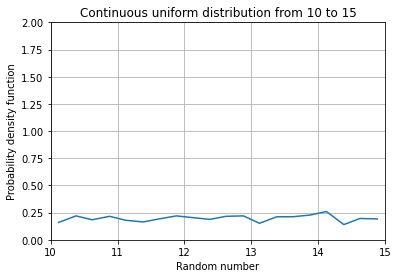

In [25]:
# Генеруємо 1000 чисел
Vipadkovi=Randab(1000,10,15)

# Перевіримо, чи не виходять числа за задані діапазони
print('Maximum:', max(Vipadkovi))
print('Minimum:', min(Vipadkovi))

# Створює функцію густини ймовірності чисел у масиві R, якщо весь діапазон значень чисел поділити на N ділянок
def NumR(a,b,R):
    R=np.array(R)
    return(((a <= R) & (R < b)).sum())

def Distribution(R,N):
    Rmin=min(R)
    Rmax=max(R)
    h=round((Rmax-Rmin)/N,2)
    Levels=[round(Rmin+h*i+h/2,2) for i in range(N)]
    Probab=[round(NumR(Levels[i]-h/2,Levels[i]+h/2,R)/len(R)/h,3) for i in range(N)]
    return(Levels,Probab)

# Проаналізуємо отриману послідовність на 20 проміжках
D=Distribution(Vipadkovi,20)
plt.plot(D[0],D[1])
plt.title('Continuous uniform distribution from 10 to 15')
plt.ylabel('Probability density function')
plt.xlabel('Random number')
plt.xlim(10,15)
plt.ylim(0,2)
plt.grid(True)

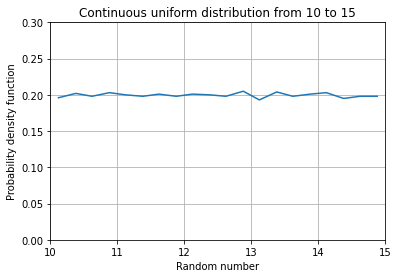

In [26]:
D=Distribution(Randab(100000,10,15),20)
plt.plot(D[0],D[1])
plt.title('Continuous uniform distribution from 10 to 15')
plt.ylabel('Probability density function')
plt.xlabel('Random number')
plt.xlim(10,15)
plt.ylim(0,0.3)
plt.grid(True)

In [27]:
print(D[0])
print(D[1])

[10.12, 10.38, 10.62, 10.88, 11.12, 11.38, 11.62, 11.88, 12.12, 12.38, 12.62, 12.88, 13.12, 13.38, 13.62, 13.88, 14.12, 14.38, 14.62, 14.88]
[0.196, 0.202, 0.198, 0.203, 0.2, 0.198, 0.201, 0.198, 0.201, 0.2, 0.198, 0.205, 0.193, 0.204, 0.198, 0.201, 0.203, 0.195, 0.198, 0.198]


# Завдання 2


In [43]:
# Задаємо всі функції, необхідні для виконання завдання 2

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from random import uniform as RN

# Метод лівих прямокутників
def IntLeft(function,lim1,lim2,h): #залежить від функції яку інтегруємо та меж інтегрування, а також від кроку
    n=round((lim2-lim1)/h) #Визначити кількість проміжків
    x=[lim1+h*i for i in range(n+1)] #Розбиваємо інтервал інтегрування на проміжки
    coffs=np.array([1 for i in range (n)]+[0]) #Задаємо коефіцієнти для конкретного методу інтегрування (всі одинички, останній 0)
    A=np.array([function(x[i]) for i in range(n+1)])*coffs #створюємо масив, що містить значення функції множені на крок та задані коефіцієнти
    Int=round(np.sum(A)*h,4) #рахуємо суму, які і є інтегралом
    return ('Left Riemann sum', Int)

# Метод правих прямокутників
def IntRight(function,lim1,lim2,h):
    n=round((lim2-lim1)/h)
    x=[lim1+h*i for i in range(n+1)]
    coffs=np.array([0]+[1 for i in range (n)]) #Відмінність методу тут: задаємо коефіцієнти для конкретного методу інтегрування (перший 0, всі одинички)
    A=np.array([function(x[i]) for i in range(n+1)])*coffs
    Int=round(np.sum(A)*h,4)
    return ('Right Riemann sum', Int)

def Trap(function,lim1,lim2,h):
    n=round((lim2-lim1)/h)
    x=[lim1+h*i for i in range(n+1)]
    coffs=np.array([0.5]+[1 for i in range (n-1)]+[0.5]) #Відмінність методу тут: задаємо коефіцієнти для конкретного методу інтегрування
    A=np.array([function(x[i]) for i in range(n+1)])*coffs
    Int=round(np.sum(A)*h,4)
    return ('Trapezoidal rule', Int)

def Simpson(function,lim1,lim2,h):
    n=round((lim2-lim1)/h)
    x=[lim1+h*i for i in range(n+1)]
    coffs=np.array([1]+[4-2*(i%2) for i in range (n-1)]+[1]) #Відмінність методу тут: задаємо коефіцієнти для конкретного методу інтегрування
    A=np.array([function(x[i]) for i in range(n+1)])*coffs
    Int=round(np.sum(A)*h/3,4)
    return ('Simpson\'s rule', Int)

def MonteCarlo(function,lim1,lim2,N): #залежить від функції, меж інтегрування, кількості точок які сиплемо на поле
    n=10000 #Для того, щоб знайти максимум та мінімум функції на проміжку розбиваємо проміжок на 100 ділянок
    h=(lim2-lim1)/n #Знаходимо необхідний для цього крок
    x=[lim1+h*i for i in range(n+1)] # Формуємо сітку по х
    A=np.array([function(x[i]) for i in range(n+1)]) #В кожній точці обчислюємо значення функції
    ylim1=min(A) #Визначаємо мінімальне з обчислених значень - нижня межа області по вертикалі
    ylim2=max(A) #Визначаємо максимальне з обчислених значень - верхня межа області по вертикалі
    S=(lim2-lim1)*(ylim2-ylim1) # Обчислюємо площу прямокутника
    NI=0 # Формуємо лічильник точок, які потрапили в зону що цікавить
    for i in range(N): # Цикл - кидання зерен, в кількості N штук
        x1=RN(lim1,lim2) # Випадковим чином генеруємо х координату точки в межах, заданих межами інтегрування
        y1=RN(ylim1,ylim2)  # Випадковим чином генеруємо у координату точки в межах, які було визначено вище
        if function(x1)>=y1: #обчислюємо значення підінтегральної функції в точці х та перевіряємо, чи воно більше за згенероване
            NI+=1 # якщо більше - то точка попала куди треба, збільшуємо лічильник на 1
    Int=round(NI*S/N+(lim2-lim1)*ylim1,4) 
    return('Monte Carlo integration', Int)

def FindIntegral(function,lim1,lim2,h,N): #залежить від підінтегральної функції, меж інтегрування, крок інтегрування та кількість випробувань методом Монте-Карло
    for method in [IntLeft,IntRight,Trap,Simpson]:
        print(method(function,lim1,lim2,h)[0]+': Integral ='+str(method(function,lim1,lim2,h)[1]))
    print(MonteCarlo(function,lim1,lim2,N)[0]+': Integral ='+str(MonteCarlo(function,lim1,lim2,N)[1]))
    
def Error(method,function,lim1,lim2,Tochne): # оцінюємо похибку інтегрування, залежно від методу, підінтегральної функції, меж інтегрування, а також  порівняно до точного значення
    if not method==MonteCarlo:
        h=[0.001,0.005,0.1,0.2,0.25,0.5]
        Err=[abs((method(function,lim1,lim2,h[i])[1]-Tochne)/Tochne*100) for i in range(len(h))]
        name=str(method(f,0,1,1)[0])
    else:
        h=[10000,50000,100000,200000,500000,1000000]
        I=[method(function,lim1,lim2,h[i])[1] for i in range(len(h))]
        Err=[abs((I[i]-Tochne)/Tochne*100) for i in range(len(h))]
        name=str(method(f,0,1,1)[0])+str(I)
    return(h,Err,name)

def AnalyzeError(f,lim1,lim2,Tochne): # функція аналізу похибки всіх методів, залежить від функції, меж інтегрування та точного значення інтегралу
    fig, a = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

    for i in range(4):
        method=[IntLeft,IntRight,Trap,Simpson]
        D=Error(method[i],f,lim1,lim2,Tochne)
        a[i//2][i%2].plot(D[0],D[1])
        a[i//2][i%2].set_title(D[2])
        a[i//2][i%2].grid(True)
        a[i//2][i%2].set_xlabel('Step h')
        a[i//2][i%2].set_ylabel('Integration error')
    
    fig, b = plt.subplots(figsize=(6,6))
    D=Error(MonteCarlo,f,lim1,lim2,Tochne)
    b.plot(D[0],D[1])
    b.set_title(D[2])
    b.grid(True)
    b.set_xlabel('Number of repeats N')
    b.set_ylabel('Integration error')
    return()

In [44]:
# Варіант 33

# Задаємо функцію згідно з варіантом
def f(x):
    return math.exp(x)*math.sin(x)**2

# Задаємо межі інтегрування
a=0
b=2

#Знаходимо значення інтеграла кожним методом: з кроком 0,01 для всіх крім Монте-Карло та з 10000 випробувань для Монте-Карло
FindIntegral(f,a,b,0.01,10000)

Left Riemann sum: Integral =4.8654
Right Riemann sum: Integral =4.9265
Trapezoidal rule: Integral =4.8959
Simpson's rule: Integral =4.8959
Monte Carlo integration: Integral =4.9621


()

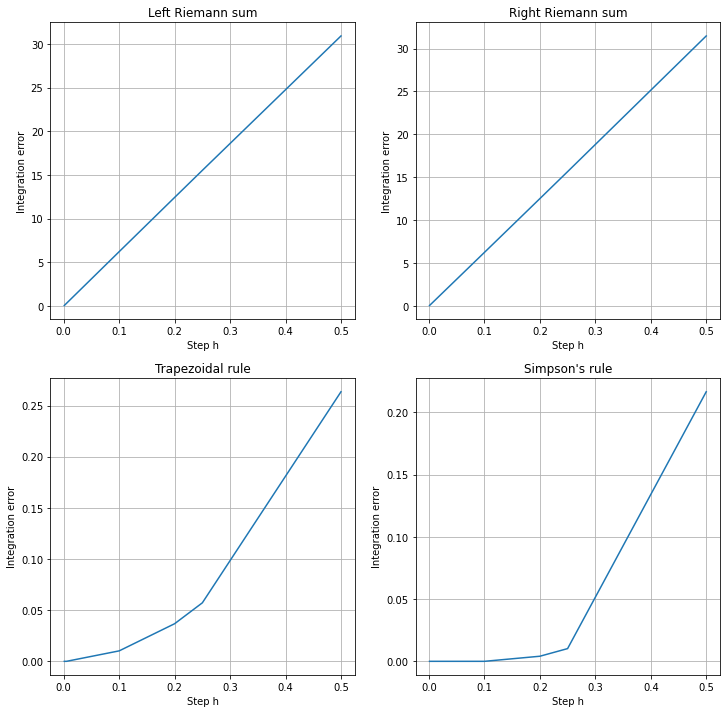

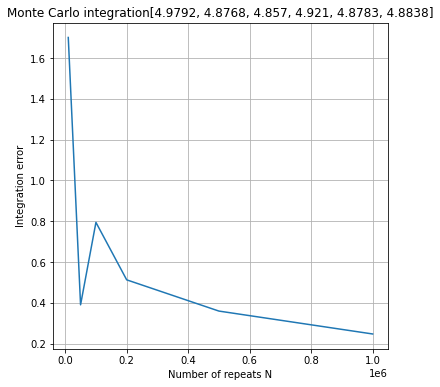

In [45]:
#Для аналізу похибки (точності) треба задати точне значення інтегралу
Tochne=4.8959

#Проаналізуємо похибку
AnalyzeError(f,a,b,Tochne)

#Завдання 3

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


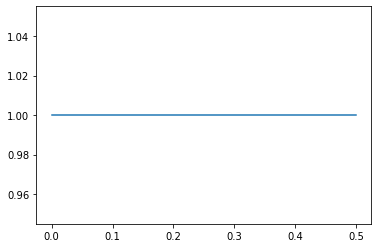

In [52]:
# Інтегральне рівняння Вольтерра 2 роду
# Метод трапецій

x0=0
xn=0.5
h=0.01
n=round((xn-x0)/h)

x=[x0+i*h for i in range(n+1)]
y=[round(math.exp(-x[0]),3)]

for i in range (1,n+1):
    a=math.exp(-x[i])
    b=h*0.5*math.exp(-i*h)*y[0]
    c=h*np.sum([y[j]*math.exp((j-i)*h) for j in range(1,i)])
    yi=round((a+b+c)/(1-0.5*h),5)
    y=y+[yi]
    
print(y)
plt.plot(x,y)

[1.0, 1.01, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


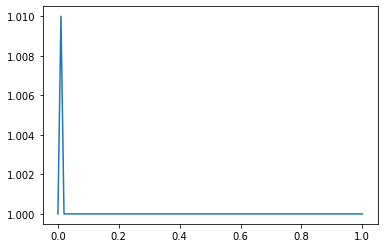

In [55]:
# Нелінійне інтегральне рівняння Вольтерра 2 роду
# Метод трапецій

x0=0
xn=1
h=0.01
n=round((xn-x0)/h)

x=[x0+i*h for i in range(n+1)]
y=[round(math.exp(-x[0]),3)]

for i in range (n):
    a=math.exp(-x[i])
    b=h*0.5*math.exp(-i*h)*y[0]*y[0]
    c=h*np.sum([y[j]*y[j]*math.exp((j-i)*h) for j in range(1,i)])
    Di=1-2*h*(a+b+c)
    yi=round((1-math.sqrt(Di))/h,3)
    y=y+[yi]
    
print(y)
plt.plot(x,y)

[16.02931266 15.5752362  14.26778336 12.26479697  9.80758395  7.19249828
  4.73512521  2.73197895  1.42452664  0.9707714   1.42468834  2.73198183
  4.73528989  7.19250413  9.80743077 12.26448444 14.2676317  15.57540542
 16.02948196 15.57540542 14.2676317  12.26448444  9.80743077  7.19250413
  4.73528989  2.73198183  1.42468834  0.9707714   1.42452664  2.73197895
  4.73512521  7.19249828  9.80758395 12.26479697 14.26778336 15.5752362
 16.02931266]
[16.02941, 15.57533, 14.26786, 12.26471, 9.80747, 7.19253, 4.73529, 2.73214, 1.42467, 0.97059, 1.42467, 2.73214, 4.73529, 7.19253, 9.80747, 12.26471, 14.26786, 15.57533, 16.02941, 15.57533, 14.26786, 12.26471, 9.80747, 7.19253, 4.73529, 2.73214, 1.42467, 0.97059, 1.42467, 2.73214, 4.73529, 7.19253, 9.80747, 12.26471, 14.26786, 15.57533, 16.02941]


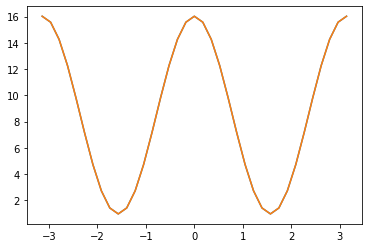

In [59]:
# Лінійне інтегральне рівняння Фредгольма 2 роду
# Метод трапецій

a=-math.pi
b=math.pi
n=36
h=(b-a)/n
A=[[0 for i in range(n+1)] for j in range(n+1)]
B=[0 for i in range(n+1)]
c=[0.5]+[1 for i in range(n-1)]+[0.5]
x=[a+h*i for i in range(n+1)]
y=[0 for i in range(n+1)]
for i in range(n+1):
    for j in range(n+1):
        if i==j:
            m=math.cos(x[i])
            A[i][j]=round(1-3*h*c[i]/10/math.pi/(0.64*m**2-1),5)
        else:
            m=math.cos((x[i]+x[j])/2)
            A[i][j]=round(-3*h*c[j]/10/math.pi/(0.64*m**2-1),5)
                                          
for i in range(n+1):
    B[i]=round(25-16*math.sin(x[i])*math.sin(x[i]),5)
    
y=np.linalg.solve(A,B)   
print(y)

def solution(x):
    y=[0 for i in range(len(x))]
    for i in range(len(x)):
        y[i]=round(17/2+128/17*math.cos(2*x[i]),5)
    return y

print(solution(x))
plt.plot(x,y,label='Numerical')
plt.plot(x,solution(x),label='Analytical')